<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-0.0.1">Описание данных</a></span></li></ul></li></ul></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1">Загрузка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.0.1">Вывод:</a></span></li></ul></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2">Умножение матриц</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Задание:" data-toc-modified-id="Задание:-2.0.1">Задание:</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.0.2">Вывод:</a></span></li></ul></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3">Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4">Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1">Вывод:</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5">Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

#### Описание данных

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.

Целевой признак: количество страховых выплат клиенту за последние 5 лет.



## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.duplicated().sum()

153

In [5]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                4847 non-null   int64  
 1   Возраст            4847 non-null   float64
 2   Зарплата           4847 non-null   float64
 3   Члены семьи        4847 non-null   int64  
 4   Страховые выплаты  4847 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 227.2 KB


<AxesSubplot:>

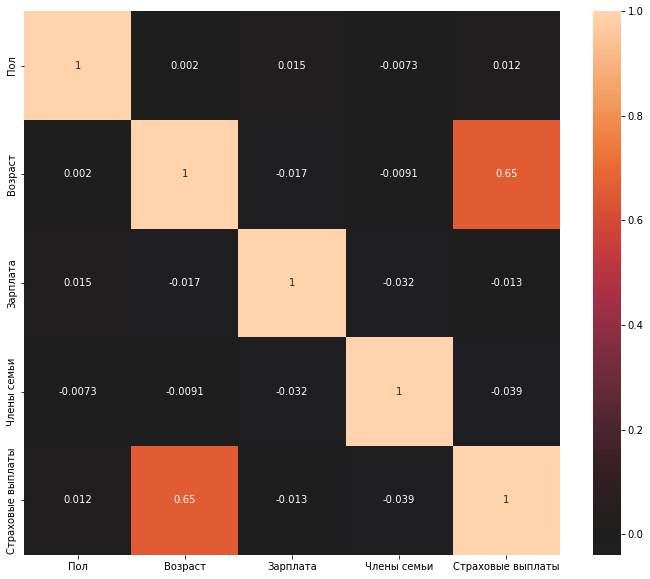

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, center=0, annot=True)

#### Вывод:
Данные выглядят нормально, удалили 153 дубликата.

Мультиколленеарность в норме.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

#### Задание:
Ответьте на вопрос и обоснуйте решение.

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

a. Изменится. Приведите примеры матриц.

b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.


**Ответ:** не измениться


**Обоснование:** 

Представим новую матрицу X1, как произведение старой матрицы X на любую обратимую матрицу А

$$
x1 = X*A
$$

Предсказания 

$$
a1 = XAw
$$

Подставляем матрицу в формулу обучения

$$
w1 = ((XA^T) XA)^{-1} XA^T y
$$

$$
w1 = ((XA)^T XA)^{-1} (XA)^T y  
$$  


Раскроем скобки

$$
w1 = (X^T A^T XA)^{-1} X^T A^T y
$$

Преобразуем данные

$$
w1 = A^{-1}(X^T X)^{-1}(A^T)^{-1}A^T X^T y
$$

Так как матрица обратимая то 

$$
(A^T)^{-1}A^T
$$

будет равно единичной матрице B

$$
w1 = A^{-1}(X^TX)^{-1}BX^Ty=A^{-1}(X^TX)^{-1}X^Ty
$$

видим

$$
(X^TX)^{-1}X^Ty
$$

равно w, получаем

$$
w1 = A^{-1}(X^TX)^{-1}X^Ty=A^{-1}w
$$

Подставляем w1 и x1 в формулу предсказания

$$
a1 = X1w1=XAA^{-1}w
$$

получаем

$$
a1=XAA^{-1}w=XBw=Xw
$$

Итог
$$
a1 = a
$$

#### Вывод:

Предсказания $a1$ для матрицы признаков умноженных на матрицу $А$ равны предсказаниям $а$.

Качество предсказания линейной регрессии не измениться, изменятся только веса.


## Алгоритм преобразования

Генерируем случайную матрицу $A$ размером 4x4.

Проверяем матрицу $A$ на обратимость

Умножаем матрицу признаков на нашу случайную матрицу, определяем метрику R2 с помощью линейной регрессии и сравниваем полученные данные R2 с данными R2 модели матрицы признаков


## Проверка алгоритма

In [7]:
features = df.drop(["Страховые выплаты"], axis=1)
target = df["Страховые выплаты"]

In [8]:
scaler = StandardScaler()
scaler.fit(features)
features_scaler = scaler.transform(features)

In [9]:
model = LinearRegression(normalize = True)
model.fit(features, target)
predictions = model.predict(features)
print("R2_score для основной модели", r2_score(target, predictions))

R2_score для основной модели 0.4302010044852067


In [10]:
matrix_a = np.random.randint(12345,size = (4, 4))
matrix = np.linalg.inv(matrix_a)
matrix

array([[ 6.96198744e-05, -4.66079319e-05,  2.46932700e-05,
         3.15447063e-05],
       [-3.16435681e-05, -1.94469129e-05,  1.12176607e-04,
         9.64207661e-06],
       [ 1.24584529e-04,  6.27900222e-05, -5.64272117e-05,
        -1.46748291e-04],
       [-1.23389864e-04,  9.38784162e-05, -9.12343674e-05,
         1.21994038e-04]])

In [11]:
features_matrix = features_scaler @ matrix_a
model.fit(features_matrix, target)
predictions_matrix = model.predict(features_matrix)
print('R2_Score для преобразованных  признаков: ',r2_score(target, predictions_matrix))

R2_Score для преобразованных  признаков:  0.4302010044852068


### Вывод:
Произвели загрузку и предпросмотр данных.

Доказали на формулах что умножение матрицы признаков на случайную матрицу не флияет на предсказания

Проверили алгоритм через метрику R2

При умножении матрицы на случайную матрицу данные шифруются без потери качества предсказания.